# Explore a netCDF dataset

# 2.1

In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [3]:
ds= xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [28]:
ds1=ds.toa_net_all_mon.mean(dim="time")

ds1_min=ds1.min()
ds1_max=ds1.max()

ds2=ds.toa_sw_all_mon.mean(dim="time")
ds2_min=ds2.min()
ds2_max=ds2.max()

Text(0.5, 1.0, 'The average of Top of The Atmosphere Net Flux from 2005 to 2015')

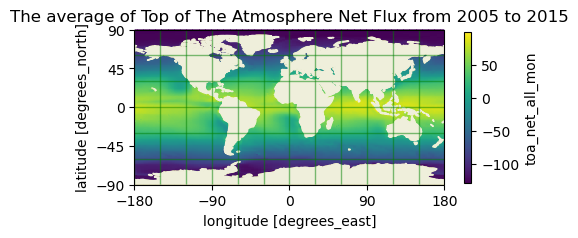

In [5]:
# 建立绘图面板
plt.figure(figsize=(5,5), dpi=100)

# 确定投影类型
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
ax.tick_params(labelsize=10)
ax.set_xticks(np.linspace(-180, 180, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 5), crs=ccrs.PlateCarree())

# 绘制高空云区域时间平均TOA长波2D图
ds1.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=ds1_min, vmax=ds1_max, cbar_kwargs={'shrink': 0.4})

# 增加国家边界
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='yellow',
                                           linewidth=0.5))

# 增加经纬线
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='green', alpha=0.5)

# 设置经纬线间距
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
#添加陆地
ax.add_feature(cfeature.LAND, zorder=1)
#图题
plt.title("The average Top of The Atmosphere Net Flux from 2005 to 2015")

# 2.2

Text(0.995, -0.13, 'The average Top of The Atmosphere Shortwave Flux around the Baoding  from 2005 to 2015')

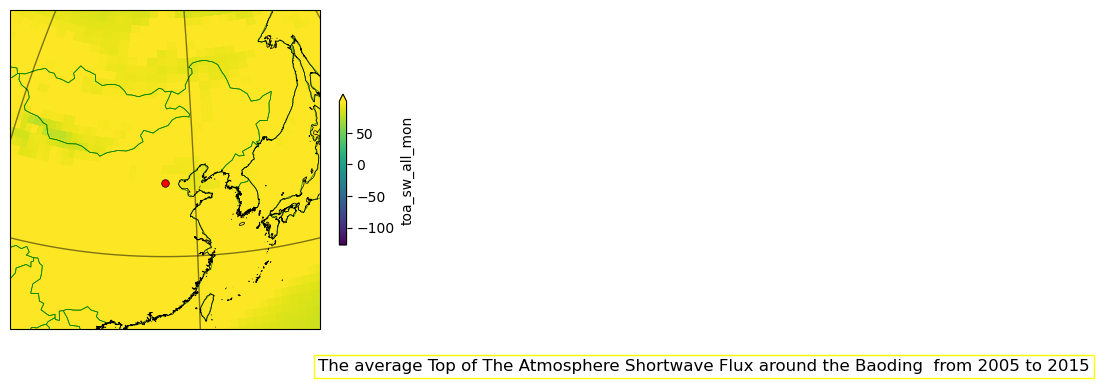

In [31]:


# 建立绘图面板
plt.figure(figsize=(5,5), dpi=100)

# 选择保定区域
central_lon, central_lat = 115.47, 38.87 # Baoding

# 选择地图类型
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

# 设置区域并绘图
extent = [central_lon-20, central_lon+20, central_lat-20, central_lat+20]
ax.set_extent(extent)

# 绘制Ttoa_sw_all_mon
ds2.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=ds1_min, vmax=ds1_max, cbar_kwargs={'shrink': 0.4})

# 增加边界 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='green',
                                           linewidth=0.5))
ax.coastlines(resolution='10m', linewidth=0.5)
ax.stock_img()

#标记保定的位置
ax.scatter(115.47, 38.87,s=30,c='r',marker='o',zorder=5,edgecolors='k', linewidths=0.5)

# 增加经纬线
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# 设置经纬线间距
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

#覆盖陆地
#ax.add_feature(cfeature.LAND, zorder=1)运行不出来，就加了＃

#给图形添加要素
ax.text(0.995,
 -0.13,
 "The average Top of The Atmosphere Shortwave Flux around the Baoding  from 2005 to 2015",
 horizontalalignment='left',
 transform=ax.transAxes,
 fontsize=12,
 bbox=dict(boxstyle='square, pad=0.25',
 facecolor='white',
 edgecolor='yellow'))